
# Descriptive statistics for data sets

### Sets of methods for collecting, characterizing, and presenting data sets

## Import libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Import .CSV file 

In [67]:
df_players = pd.read_csv('transfers.csv')

In [68]:
df_players

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
1,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
2,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia
3,1047109,2026-06-30,25/26,2672,265,APO Levadiakos,Panathinaikos,0.0,200000.0,Georgios Katris
4,302215,2025-12-31,25/26,279,86,Ferencváros,Werder Bremen,0.0,1000000.0,Naby Keïta
...,...,...,...,...,...,...,...,...,...,...
78521,35207,1995-07-01,95/96,42281,11896,PTSV Dort. Yth.,Dortmund Yth.,0.0,NaN,Marco Reus
78522,22141,1994-07-01,94/95,59178,29463,Castellammare,Sorrento Youth,NaN,NaN,Antonio Mirante
78523,33829,1994-07-01,94/95,58405,53957,FC Penafiel You,Sporting Yth.,NaN,NaN,José Fonte
78524,40680,1994-07-01,94/95,47320,47318,Lichtenw. Yth.,Schornbach Yth.,0.0,NaN,Sven Ulreich


In [69]:
# Rename a column of the dataset
df_players_rename = df_players.rename(columns={'market_value_in_eur': 'value_in_eur'})

In [70]:
# df_players_rename

In [71]:
# Dataset sorted 
df_sorted = df_players_rename.sort_values(by='value_in_eur', ascending= False)

In [72]:
# df_sorted

## 1. Measures of central tendency

In [73]:
df_players.shape

(78526, 10)

In [74]:
df_players.describe()

,player_id,from_club_id,to_club_id,transfer_fee,market_value_in_eur
count,7.852600e+04,78526.00000,78526.000000,5.114000e+04,4.855400e+04
mean,4.192632e+05,17086.85154,12856.930023,1.105624e+06,2.456946e+06
std,2.664637e+05,23360.71259,20343.266199,5.246361e+06,5.870114e+06
min,3.333000e+03,1.00000,1.000000,0.000000e+00,1.000000e+04
25%,2.050230e+05,862.00000,601.000000,0.000000e+00,2.000000e+05
50%,3.693840e+05,6668.50000,2995.000000,0.000000e+00,6.000000e+05
75%,5.919160e+05,24214.00000,14648.000000,0.000000e+00,2.000000e+06
max,1.319047e+06,125342.00000,125074.000000,1.800000e+08,1.800000e+08


In [75]:
mean = df_players['market_value_in_eur'].mean()
print(f'\nThe mean of market value is = {mean}')


The mean of market value is = 2456945.5039749555


In [76]:
median = df_players['market_value_in_eur'].median()
print(f'\nThe median of market value is = {median}')


The median of market value is = 600000.0


In [77]:
mode = df_players['market_value_in_eur'].mode()
print(f'\nThe mode of market value is = {mode}')


The mode of market value is = 0    100000.0
Name: market_value_in_eur, dtype: float64


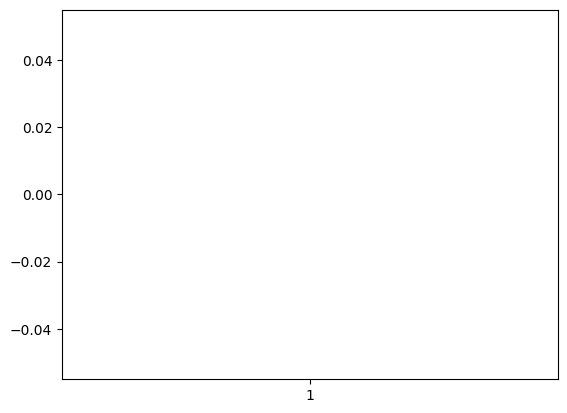

In [78]:
# Boxplot 
plt.boxplot(df_players['market_value_in_eur'])

plt.show()


In [79]:
# Improve the boxplot
# Quartile calculation
Q1 = df_players['market_value_in_eur'].quantile(0.25)
Q3 = df_players['market_value_in_eur'].quantile(0.75)

# Interquartil range
IQR = Q3 - Q1
print(f'\nQ1: {Q1}')
print(f'\nQ3: {Q3}')
print(f'\nThe interquatil range is: {IQR}')

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_players[(df_players['market_value_in_eur'] >= lower_bound) & (df_players['market_value_in_eur'] <= upper_bound)]


Q1: 200000.0

Q3: 2000000.0

The interquatil range is: 1800000.0


In [80]:
df_filtered.describe()

,player_id,from_club_id,to_club_id,transfer_fee,market_value_in_eur
count,4.215400e+04,42154.000000,42154.000000,3.413700e+04,4.215400e+04
mean,3.691042e+05,8460.724534,7485.689330,3.424101e+05,8.657952e+05
std,2.360770e+05,15221.812169,15198.173223,1.298654e+06,1.003036e+06
min,3.333000e+03,1.000000,1.000000,0.000000e+00,1.000000e+04
25%,1.852450e+05,515.000000,449.000000,0.000000e+00,2.000000e+05
50%,3.342220e+05,2293.000000,1162.000000,0.000000e+00,4.500000e+05
75%,5.219350e+05,9250.000000,6600.000000,0.000000e+00,1.000000e+06
max,1.280281e+06,121692.000000,120649.000000,3.110000e+07,4.700000e+06


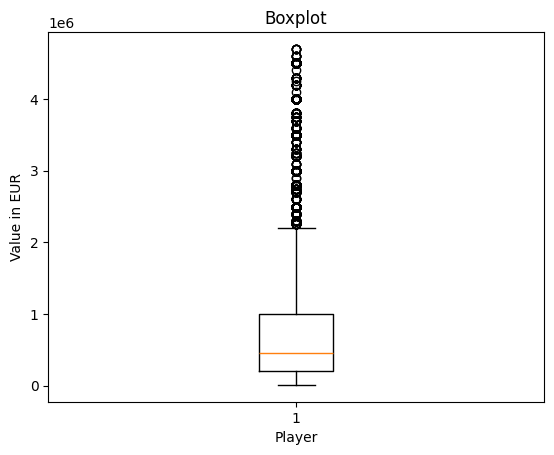

In [81]:
# New dataset boxplot
plt.boxplot(df_filtered['market_value_in_eur'])

plt.ylabel('Value in EUR')
plt.xlabel('Player')
plt.title('Boxplot')

plt.show()

In [82]:
df_filtered.shape

(42154, 10)

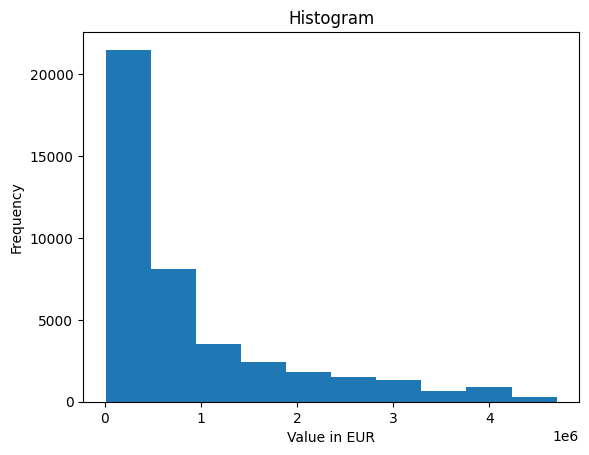

In [83]:
plt.hist(df_filtered['market_value_in_eur'])

plt.ylabel('Frequency')
plt.xlabel('Value in EUR')
plt.title('Histogram')

plt.show()

## 2. Dispersion measures

In [84]:

# Variance
df_filtered['market_value_in_eur'].var()

np.float64(1006082201228.849)

In [85]:
# Standard desviation
df_filtered['market_value_in_eur'].std()

np.float64(1003036.4904772154)

## 3. Diagram correlation 

In [86]:
df_filtered_numeric = df_filtered[['player_id', 'market_value_in_eur']].copy()

In [87]:
# df_filtered_numeric

In [88]:
# Matrix correlation
correlation_matrix = df_filtered_numeric.corr()

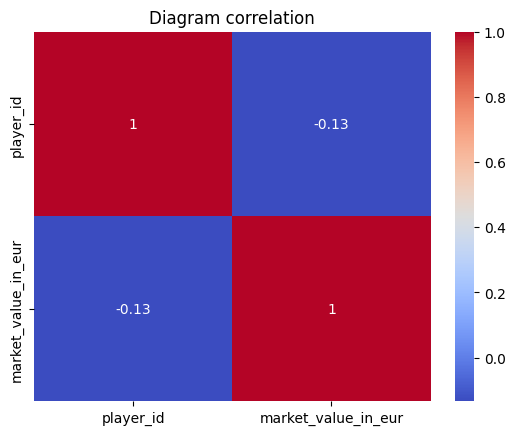

In [89]:
# Correlation diagram 
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm')

plt.title('Diagram correlation')
plt.show()

# 4. Dispersion diagram

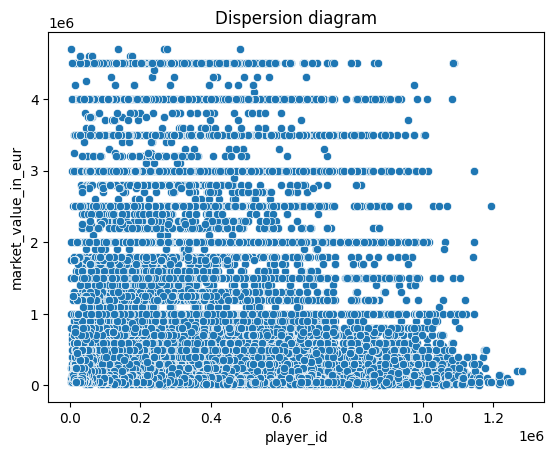

In [90]:
sns.scatterplot(df_filtered_numeric, x='player_id', y='market_value_in_eur' )

plt.title('Dispersion diagram')

plt.show()

## Case study: houses in neighborhood

### 1. Import dataset

In [91]:
# Import dataset
df_houses = pd.read_csv('kc_house_data.csv')

### 2. Dataset exploration

In [92]:
df_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [93]:
df_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 3. Correlation diagram

In [94]:
# Create a dataset using just the variables that i have to plot in the correlation diagram
df_houses_new = df_houses[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']]

In [95]:
# Correlation matrix
correlation_matrix = df_houses_new.corr()

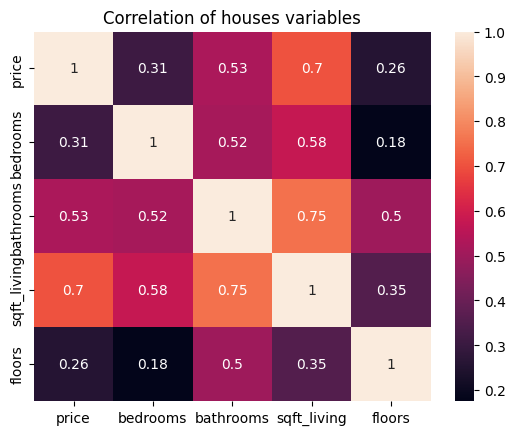

In [96]:
# Correlation diagram
sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation of houses variables')

plt.show()

## 4. Dispersion diagram 

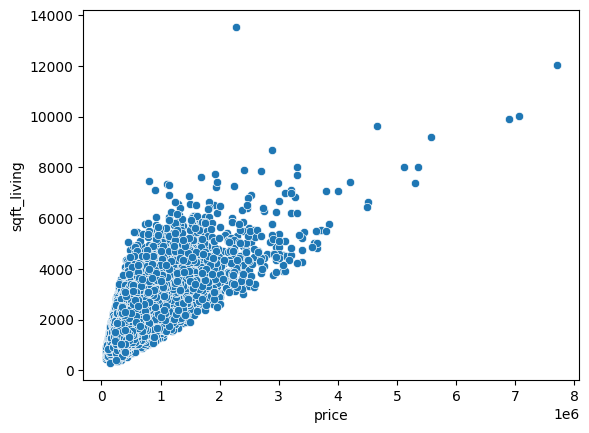

In [97]:
sns.scatterplot(x= 'price', y= 'sqft_living', data= df_houses_new)


plt.show()